In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../experiments/sw-data/sigmax.csv')

df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
df.sort_values(['max_values', 'throughput'], inplace=True)
display(df)


,framework,api,allocated,max_values,num_jsons,bytes_in,bytes_out,time,throughput
10,ANTLR4,NaN,False,1,7271551,134217732,58172400,21.879500,6.134406e+06
3,RapidJSON,DOM,False,1,7271551,134217732,58172400,0.999752,1.342510e+08
4,RapidJSON,DOM (in situ),False,1,7271551,134217732,58172400,0.848362,1.582081e+08
0,simdjson,DOM,False,1,7271551,134217732,58172400,0.484217,2.771851e+08
5,RapidJSON,SAX,False,1,7271551,134217732,58172400,0.479094,2.801491e+08
1,simdjson,DOM,True,1,7271551,134217732,58172400,0.437523,3.067673e+08
2,simdjson,DOM (no keys),True,1,7271551,134217732,58172400,0.431806,3.108288e+08
6,RapidJSON,SAX,True,1,7271551,134217732,58172400,0.429857,3.122381e+08
11,Boost Spirit.X3,NaN,False,1,7271551,134217732,58172400,0.199346,6.732903e+08
8,Custom,NaN,False,1,7271551,134217732,58172400,0.118191,1.135600e+09


In [4]:
dg = df.groupby(['framework', 'max_values', 'bytes_in', 'bytes_out']).agg({'throughput':'max'})
dg.sort_values(by=['framework', 'max_values'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']
display(dg)


Throughput (GB/s)
framework       max_values bytes_in  bytes_out                   
ANTLR4          1          134217732 58172400            0.006134
                2          134217737 77846056            0.005621
                4          134217740 106981184           0.005623
                8          134217764 142137952           0.005019
                16         134217768 176011712           0.004973
                32         134217827 202386616           0.004788
                64         134217903 219658600           0.004798
                128        134217816 229692704           0.004755
                256        134218013 235110176           0.004808
Boost Spirit.X3 1          134217732 58172400            0.673290
                2          134217737 77846056            0.489980
                4          134217740 106981184           0.409523
                8          134217764 142137952           0.346768
                16         134217768 176011712           0.326726
                32         134217827 202386616           0.314685
                64         134217903 219658600           0.307218
                128        134217816 229692704           0.302349
                256        134218013 235110176           0.297960
Custom          1          134217732 58172400            1.572023
                2          134217737 77846056            1.043481
                4          134217740 106981184           0.806975
                8          134217764 142137952           0.651856
                16         134217768 176011712           0.584453
                32         134217827 202386616           0.530782
                64         134217903 219658600           0.504213
                128        134217816 229692704           0.465556
                256        134218013 235110176           0.479614
RapidJSON       1          134217732 58172400            0.312238
                2          134217737 77846056            0.285889
                4          134217740 106981184           0.280850
                8          134217764 142137952           0.279025
                16         134217768 176011712           0.281970
                32         134217827 202386616           0.284418
                64         134217903 219658600           0.285803
                128        134217816 229692704           0.286512
                256        134218013 235110176           0.284648
simdjson        1          134217732 58172400            0.310829
                2          134217737 77846056            0.301333
                4          134217740 106981184           0.286260
                8          134217764 142137952           0.272895
                16         134217768 176011712           0.269148
                32         134217827 202386616           0.265417
                64         134217903 219658600           0.263489
                128        134217816 229692704           0.263071
                256        134218013 235110176           0.262025

In [5]:
dh = dg.unstack('framework')
dh.index.rename(inplace=True, names=['Max. values', 'Bytes in', 'Bytes out'])
dh = dh.droplevel(0, axis=1)
display(dh)

,,framework,ANTLR4,Boost Spirit.X3,Custom,RapidJSON,simdjson
Max. values,Bytes in,Bytes out,,,,,
1,134217732,58172400,0.006134,0.673290,1.572023,0.312238,0.310829
2,134217737,77846056,0.005621,0.489980,1.043481,0.285889,0.301333
4,134217740,106981184,0.005623,0.409523,0.806975,0.280850,0.286260
8,134217764,142137952,0.005019,0.346768,0.651856,0.279025,0.272895
16,134217768,176011712,0.004973,0.326726,0.584453,0.281970,0.269148
32,134217827,202386616,0.004788,0.314685,0.530782,0.284418,0.265417
64,134217903,219658600,0.004798,0.307218,0.504213,0.285803,0.263489
128,134217816,229692704,0.004755,0.302349,0.465556,0.286512,0.263071
256,134218013,235110176,0.004808,0.297960,0.479614,0.284648,0.262025


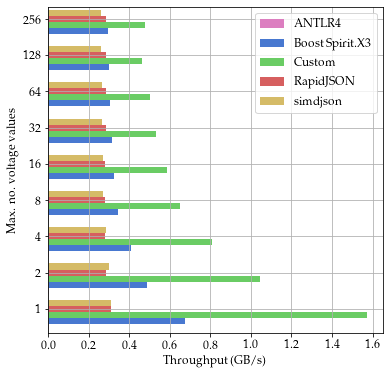

In [7]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

#dh.columns.rename(inplace=True, name='Framework')
#dh.index.rename(inplace=True, name='Max. values')

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']

y_labels = [x[0] for x in dh.index.to_list()]
y_ticks = np.arange(0, len(y_labels))

impls = dh.columns.to_list()
bars = []
height = 1/(len(impls)+1)

for i, impl in enumerate(impls):
    x = dh[impl].to_numpy()
    y = np.arange(0, len(x))

    b = ax.barh(y=y+i*height, width=x, height=height, color=colors[i])
    bars.append(b)

ax.set_ylim(-height, len(y_labels)-height)

ax.set_yticks(y_ticks + 0.5)
ax.set_yticklabels(y_labels)
ax.set_ylabel("Max. no. voltage values")

ax.set_xlabel("Throughput (GB/s)")

ax.grid(which='both')

ax.legend(bars, impls)

fig.savefig('software.pdf')